### PyTorch computer vison

Basic library for CV
* torchvison
* torchvison.dataset - get datasets and data loading fun for CV
* torchvision.model - get pretrained model that can use in your model
* torchvision.transform - fun for manipualting vision data (image)
* torch.utils.data.Datadet - base dataset class for PyTorch
* torch.utils.data.DataLoader - Creates a Python iterable over a dataset

In [ ]:
# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

# Cheak verison
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


### Geting a data sets

The dataset we will be using is FashonMNIST from torchvision.datasets  

In [ ]:
# Setup traning data
train_data = datasets.FashionMNIST(
    root="data", # where to download data?
    train=True, # do we want the traning data sets ?
    download=True, # do we want to download a datasets ? Y/N
    transform=torchvision.transforms.ToTensor(), # how do we want ro transform the data?
    target_transform=None # how do we want to transform the label/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
print(f"image.shape: {image.shape} -> [color channel, height, width]")
print(f"Image label: {class_name[label]}")

image.shape: torch.Size([1, 28, 28]) -> [color channel, height, width]
Image label: Ankle boot


### Visualization our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

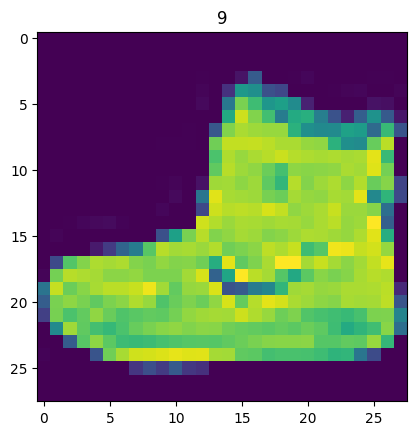

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

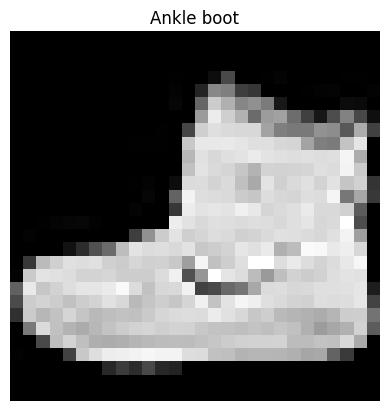

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis(False)

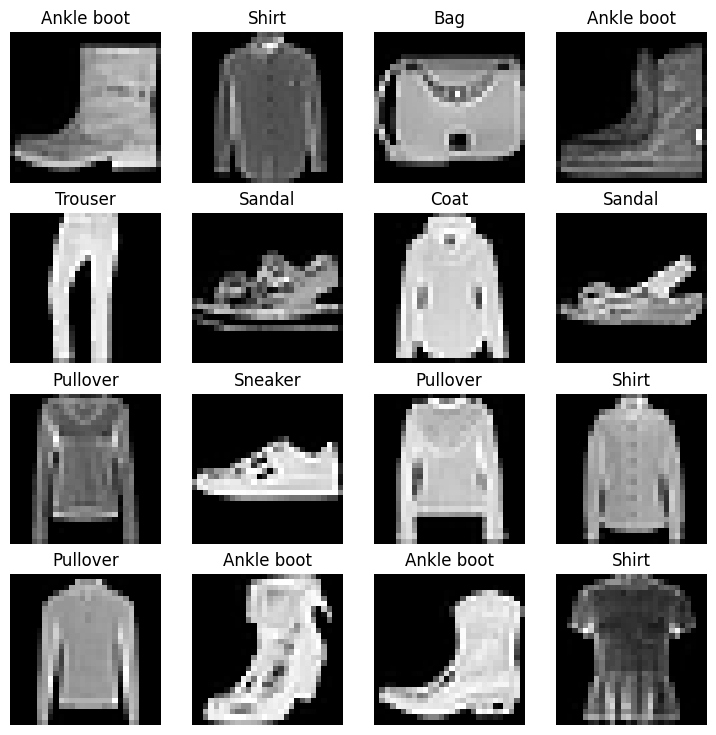

In [ ]:
# Plot more image
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(class_name[label])
  plt.axis(False)

### Prepare DataLoader

Right now, data is in the format of PyTorch Datasets.

DataLoader turns datasets into a Python iterable.

More specifically, we want to turn data into batches (or mini-batches) less calucualte for GPU but give as good aproximation. Comonly we use batch size of 32 (32 images a time). And second positive about use mini baches is gice NN more chance to upragde gradients per epoch.



In [ ]:
from torch.utils.data import DataLoader

# setup batch size hyperparamiter
BATCH_SIZE = 32

# Turn datasets into iterables(bates)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb16b05dcf0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb16b015b40>)

In [ ]:
# Lets cheak out what we create
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)}, batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)}, baches of {BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7fb16b05dcf0>, <torch.utils.data.dataloader.DataLoader object at 0x7fb16b015b40>)
Length of train_dataloader: 1875, batches of 32
Length of test_dataloader: 313, baches of 32


In [ ]:
# Cheak out whats inside the traninig dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape, train_labels_batch.shape)
test_fearures_batch, test_labels_batch = next(iter(test_dataloader))

torch.Size([32, 1, 28, 28]) torch.Size([32])


Image size: torch.Size([1, 28, 28])
Labesl: 6, label size: torch.Size([])


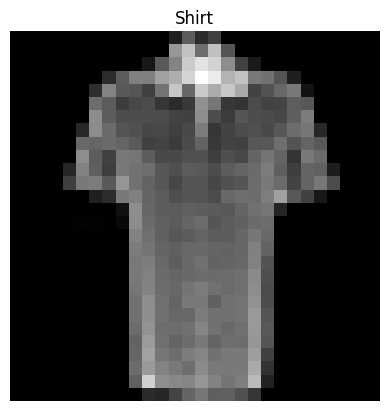

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_name[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Labesl: {label}, label size: {label.shape}")

### Build a baseline model

When starting to build a series of machine learning modleing experiments, its best pratice to start with baseline model. A baseline modle is a simply model you will try and improve upon with subsequent models/experiments.

In [ ]:
# Create a faltten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

# Fllaten the sample
output = flatten_model(x)  # perform forward pass

# Print out what happend
print(f"Shape before flattening: {x.shape} -> [color_channel, height, width]")
print(f"Shape after flatteening: {output.shape} -> [color_chanel, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channel, height, width]
Shape after flatteening: torch.Size([1, 784]) -> [color_chanel, height*width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
                       nn.Flatten(),
                       nn.Linear(in_features=input_shape,
                                 out_features=hidden_units),

                       nn.Linear(in_features=hidden_units,
                                 out_features=output_shape)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# setup insacne of model

model_0 = FashionMNISTModelV0(input_shape=28*28 , #784
                              hidden_units=10,
                              output_shape=len(class_name)).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Setup loss, optimizer, and evaluate metrics

* Loss fun - multiclass data works comonly on 'nn.CrossEntropyLoss()'
* Optimizer - optimizer 'torch.optim.SGD()'
* Evaluation metric - use accruancy to evaluate metric

In [ ]:
import requests
from pathlib import Path

# Download helper fun from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_function allredy exist and skip download")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

helper_function allredy exist and skip download


In [ ]:
# Setup a loss fun
loss_fn = nn.CrossEntropyLoss()

# Setup optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.01)

In [ ]:
### Function for time compilation
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Print difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f}")
  return total_time

In [ ]:
start_time = timer()
# some code...
end_time = timer()

print_train_time(start=start_time,
                 end=end_time,
                 device='cpu')

Train time on cpu: 0.000


5.3929000046082365e-05

### Creating a traning loop and train model on batches of data

* Loop through epochs.
* Loop through traning batches, perform traning steps, calcuyalte the train loss per catch
* Loop through testing batches, perform testing steps, calcualte the test loss per batch
* Print out what happend
* Time it all

In [ ]:
# Import tqdm for progres bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_timer_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create traning and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  ### Traning
  train_loss = 0
  # Add a loop to loop through the traning batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # Forward pass
    y_pred = model_0(X)

    # Calcualte a loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # opimazaer zero grad
    optimizer.zero_grad()

    # loss bacward propagation
    loss.backward()

    # optimzer step
    optimizer.step()

    # Print out what happend
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by lengght of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Forward pass
      test_pred = model_0(X_test)

      # Calcualalte a loss
      test_loss += loss_fn(test_pred, y_test)

      # Calcualte acc
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calcualte the test lost av per batch
    test_loss /= len(test_dataloader)

    # Calulate the test acc avrage per batch
    test_acc /= len(test_dataloader)

  # Print out what happend
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

  # Calcualte traning time
  train_timer_end_on_cpu = timer()
  model0_time = print_train_time(train_timer_start_on_cpu, train_timer_end_on_cpu,
                                              device=str(next(model_0.parameters()).device))





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5645 | Test loss: 0.5088, Test acc: 82.2384
Train time on cpu: 11.674
Epoch: 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5013 | Test loss: 0.4899, Test acc: 83.0471
Train time on cpu: 22.893
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4809 | Test loss: 0.5726, Test acc: 80.4712
Train time on cpu: 33.984


In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Building a better model of nonlinearity

In [ ]:
### Bulid nonlinear model
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_unit: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
                       nn.Flatten(), # Flaten layer
                       nn.Linear(in_features=input_shape,
                                 out_features=hidden_unit),
                       nn.ReLU(),
                       nn.Linear(in_features=hidden_unit,
                                 out_features=output_shape),
                       nn.ReLU()
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)



In [ ]:
# Crate instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_unit=10,
                              output_shape=len(class_name))

next(model_1.parameters()).device


device(type='cpu')

In [ ]:
# set up loss and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(),
                          lr=0.01)

### Funcionazing a trening and evaluatinon/testing loop

* traning loop - `train_step()`
* testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


In [ ]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)
start_gpu = timer()

# set epochs
eposchs = 3

# Create a optimization and evaluation loop
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n---------------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=nn.CrossEntropyLoss(),
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=nn.CrossEntropyLoss(),
             accuracy_fn=accuracy_fn,
             device=device)

stop_gpu = timer()

model1_time = print_train_time(start=start_gpu,
                 end=stop_gpu,
                 device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
---------------
Train loss: 0.77872 | Train accuracy: 72.19%
Test loss: 0.72671 | Test accuracy: 74.80%

epoch: 1
---------------
Train loss: 0.69171 | Train accuracy: 74.85%
Test loss: 0.74682 | Test accuracy: 72.90%

epoch: 2
---------------
Train loss: 0.66968 | Train accuracy: 75.67%
Test loss: 0.70321 | Test accuracy: 74.17%

Train time on cpu: 34.514


In [ ]:
torch.manual_seed(42)


def eval_model(model, data_loader, loss_fn, accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    model.to(device)
    with torch.no_grad():
        for X, y in tqdm(data_loader):
            # Move data to device
            X, y = X.to(device), y.to(device)

            # Make prediction
            y_pred = model(X)

            # Calculate loss and accuracy
            loss += loss_fn(y_pred, y).item()
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Average loss and accuracy
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss,
            "model_acc": acc}


In [ ]:
model_1_result = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_0_result = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
print(model_1_result)
print(model_0_result)

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.5725629602472622, 'model_acc': 80.47124600638978}
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.7032085076307717, 'model_acc': 74.17132587859425}


In [ ]:
# Create a convolution neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model achitecture that replicate the TinyVGG
  model from CNN explainer website
  """
  def __init__(self,
               input_shape: int,
               hidden_unit: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
                        # Create a convolution layer
                        nn.Conv2d(in_channels=input_shape,
                                  out_channels=hidden_unit,
                                  kernel_size=3,
                                  stride=1,
                                  padding=1),
                        nn.ReLU(),
                        nn.Conv2d(in_channels=hidden_unit,
                                  out_channels=hidden_unit,
                                  kernel_size=3,
                                  stride=1,
                                  padding=1),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
                        nn.Conv2d(in_channels=hidden_unit,
                                  out_channels=hidden_unit,
                                  kernel_size=3,
                                  stride=1,
                                  padding=1),
                        nn.ReLU(),
                        nn.Conv2d(in_channels=hidden_unit,
                                  out_channels=hidden_unit,
                                  kernel_size=3,
                                  stride=1,
                                  padding=1),
                        nn.MaxPool2d(kernel_size=2)

    )
    self.classyfier = nn.Sequential(
                      nn.Flatten(),
                      nn.Linear(in_features=hidden_unit*7*7,
                                out_features=output_shape)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x)
    x = self.classyfier(x)

    return x



In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_unit=10,
                              output_shape=len(class_name)).to(device)

In [ ]:
y = train_data[0][0].to(device)
model_2(y.unsqueeze(dim=1))

tensor([[ 0.0135, -0.0230,  0.0398,  0.0066, -0.0652, -0.0029,  0.0536, -0.0665,
          0.0481, -0.0347]], grad_fn=<AddmmBackward0>)

image shape torch.Size([32, 3, 64, 64])
test image shape: torch.Size([3, 64, 64])


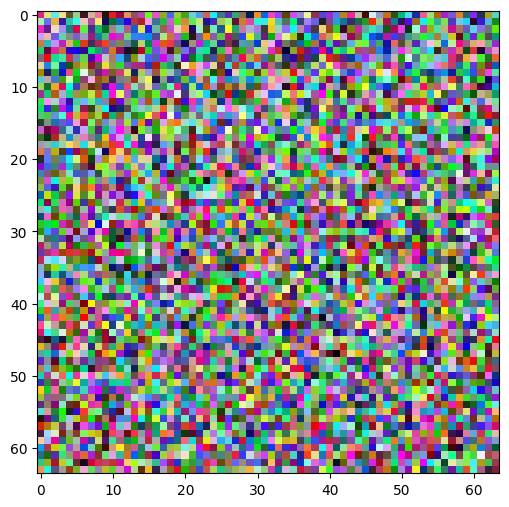

In [ ]:
torch.manual_seed(42)
images = torch.rand(size=(32, 3, 64, 64))
test_image = images[0]
fig = plt.figure(figsize=(6, 6))
plt.imshow(test_image.permute(1, 2, 0))
print(f"image shape {images.squeeze(dim=3).shape}")
print(f"test image shape: {test_image.shape}")

torch.Size([1, 1, 66, 66])
torch.Size([1, 66, 66])


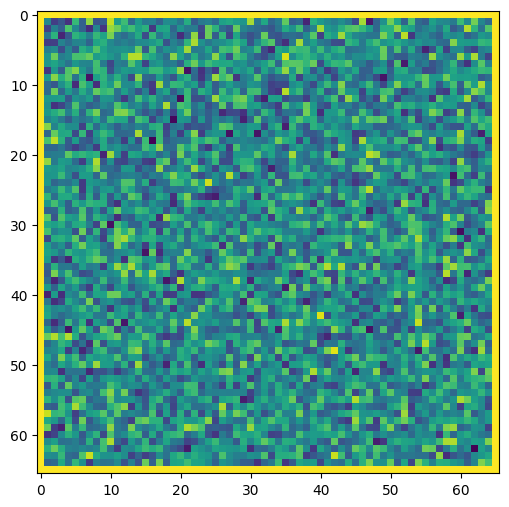

In [ ]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=1,
                       kernel_size=(1, 1),
                       stride=1,
                       padding=1)


# Pass the data throught the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(dim=0))
print(conv_output.shape)
print(conv_output.squeeze(dim=0).shape)
fig = plt.figure(figsize=(6, 6))
plt.imshow(conv_output.squeeze(dim=0).permute(1, 2, 0).detach().numpy())

In [ ]:
### Train and test model2
torch.manual_seed(42)

# set up epochs number
epochs = 3

# set up a loss function, optimizer and acc function
loss_fn = nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_2.parameters(),
                           lr=0.01)

start_model3 = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=nn.CrossEntropyLoss(),
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=nn.CrossEntropyLoss(),
             accuracy_fn=accuracy_fn,
             device=device)
stop_model3 = timer()

model3_time = print_train_time(start=start_model3,
                   end=stop_model3,
                   device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss: 0.44891 | Train accuracy: 83.78%
Test loss: 0.37644 | Test accuracy: 86.60%

Epoch: 1
-----------
Train loss: 0.35642 | Train accuracy: 87.06%
Test loss: 0.36910 | Test accuracy: 86.13%

Epoch: 2
-----------
Train loss: 0.34660 | Train accuracy: 87.40%
Test loss: 0.36446 | Test accuracy: 86.73%

Train time on cpu: 154.795


In [ ]:
model_2_result = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_2_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3644614874031216,
 'model_acc': 86.73123003194888}

In [ ]:
import pandas as pd
compare_result = pd.DataFrame([model_0_result,
                              model_1_result,
                              model_2_result])
compare_result["trainig time"] = [model0_time, model1_time, model3_time]
compare_result

,model_name,model_loss,model_acc,trainig time
0,FashionMNISTModelV1,0.703209,74.171326,33.983576
1,FashionMNISTModelV0,0.572563,80.471246,34.514001
2,FashionMNISTModelV2,0.364461,86.731230,154.794848


Text(0, 0.5, 'model')

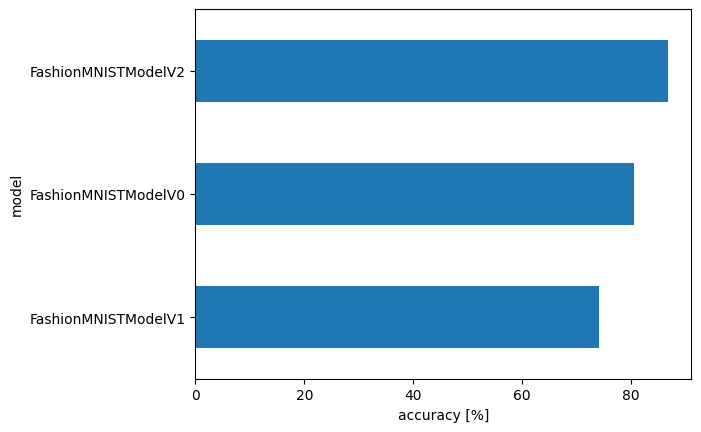

In [ ]:
# Visualizate our model result
compare_result.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy [%]")
plt.ylabel("model")

In [ ]:
# Make and evaluate random predictions with best model
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Preapare the sample (add batch dim and pass to target device)
      sample = sample.unsqueeze(dim=0).to(device)

      # forawwrd pass (model output raw logits)
      pred_logits = model(sample)

      # Get predictions propability (raw logits -> predict propasbility)
      pred_prob = pred_logits.squeeze(dim=0).softmax(dim=0)

      # Get pred_prob off the GPU
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)



torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Sandal')

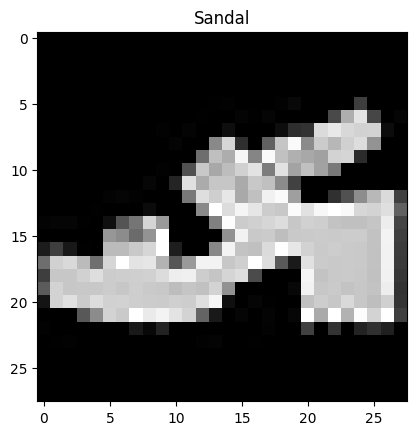

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

print(test_samples[0].shape)
plt.imshow(test_samples[0].squeeze(dim=0), cmap='gray')
plt.title(class_name[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# Viev first two predictions
pred_probs[:2]

tensor([[1.5692e-09, 3.2204e-09, 2.8623e-09, 5.0277e-10, 1.4887e-11, 9.9992e-01,
         4.9708e-09, 2.8151e-07, 7.2920e-08, 7.6643e-05],
        [5.6096e-02, 8.1317e-01, 5.6847e-05, 7.1984e-03, 6.5726e-03, 8.4203e-06,
         1.1559e-01, 4.0730e-04, 8.7856e-04, 1.8967e-05]])

In [ ]:
# Convert prediction probabilitis to label
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 9, 4, 3, 0, 4, 7, 1])

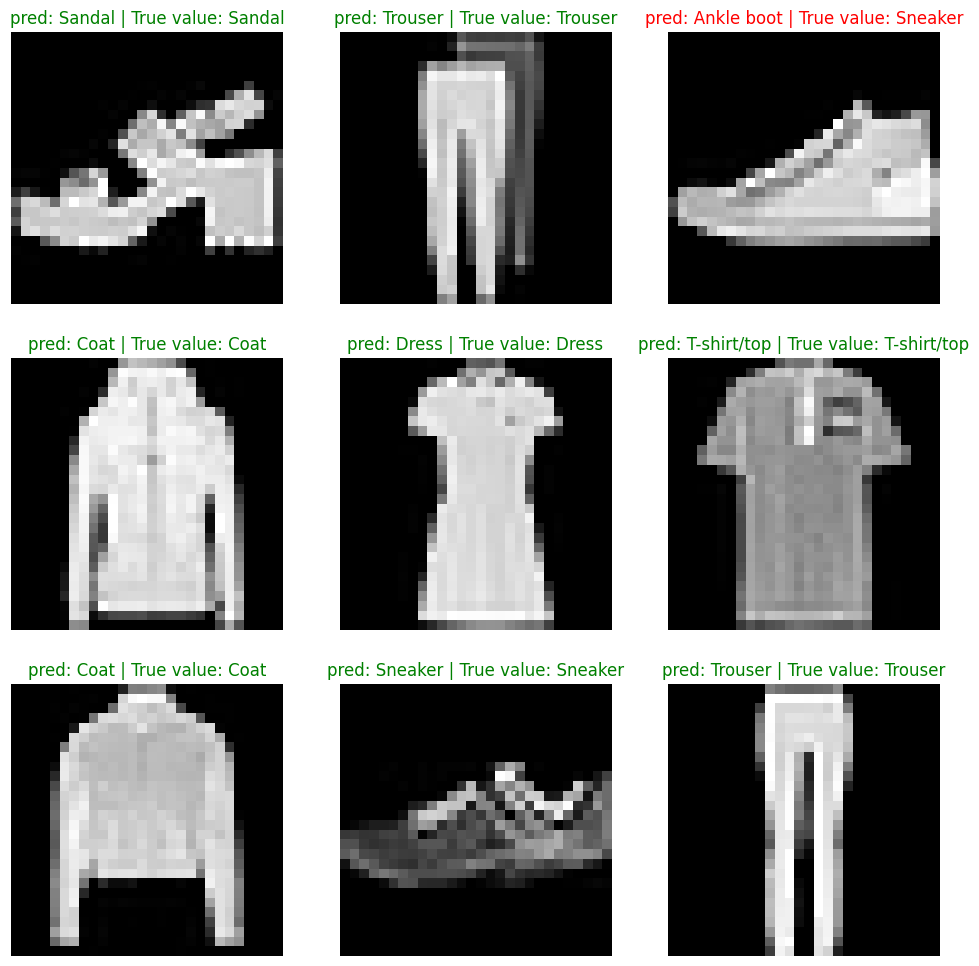

In [ ]:
# Plot predictins
fig = plt.figure(figsize=(12, 12))
cols, rows = 3, 3
for i in range(0, len(test_samples)):
  fig.add_subplot(rows, cols, i+1)
  plt.imshow(test_samples[i].squeeze(dim=0), cmap='gray')
  if class_name[test_labels[i]] == class_name[pred_classes[i]]:
      title_color = 'green'
  else:
      title_color = 'red'

  plt.title(f"pred: {class_name[pred_classes[i]]} | True value: {class_name[test_labels[i]]}", color=title_color)

  plt.axis(False)

In [ ]:
y_preds = []

model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_logit = model_2(X)
    # Turn raw logits to predictions
    #y_pred = torch.softmax(y_logit.squeeze(dim=1), dim=0).argmax(dim=1)
    y_pred = torch.argmax(y_logit.squeeze(dim=1), dim=1)
    # Put predictions to CPU
    y_preds.append(y_pred.cpu())


#print(y_preds)
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor[:5]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6])

In [ ]:
# plot confiusing matrix using mxextend
import mlxtend
mlxtend.__version__

'0.22.0'

In [ ]:
pip install torchmetrics

In [ ]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

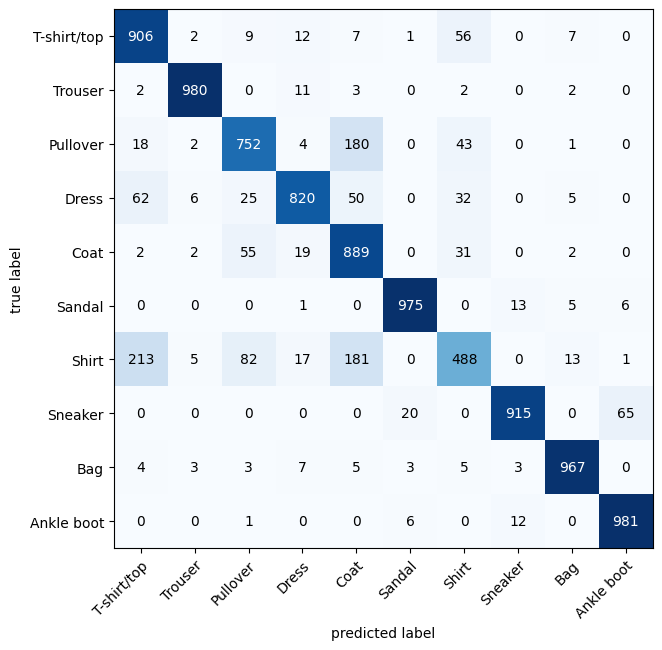

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup a confiusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_name))
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_name,
                                figsize=(10, 7))

### Save and load best perform model

In [ ]:
from pathlib import Path

# Create model dictonary path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME="CNN_Feshion_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/CNN_Feshion_model.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_unit=10,
                                     output_shape=len(class_name))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Move model to device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classyfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_result

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3644614874031216,
 'model_acc': 86.73123003194888}

In [ ]:
# Evaluate loaded model
result_loaded_model = eval_model(model=loaded_model_2,
                                 data_loader=test_dataloader,
                                 loss_fn=loss_fn,
                                 accuracy_fn=accuracy_fn)
result_loaded_model

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3644614874031216,
 'model_acc': 86.73123003194888}